#### Exercise 13 - Solution - Estimate Regression Discontinuity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf


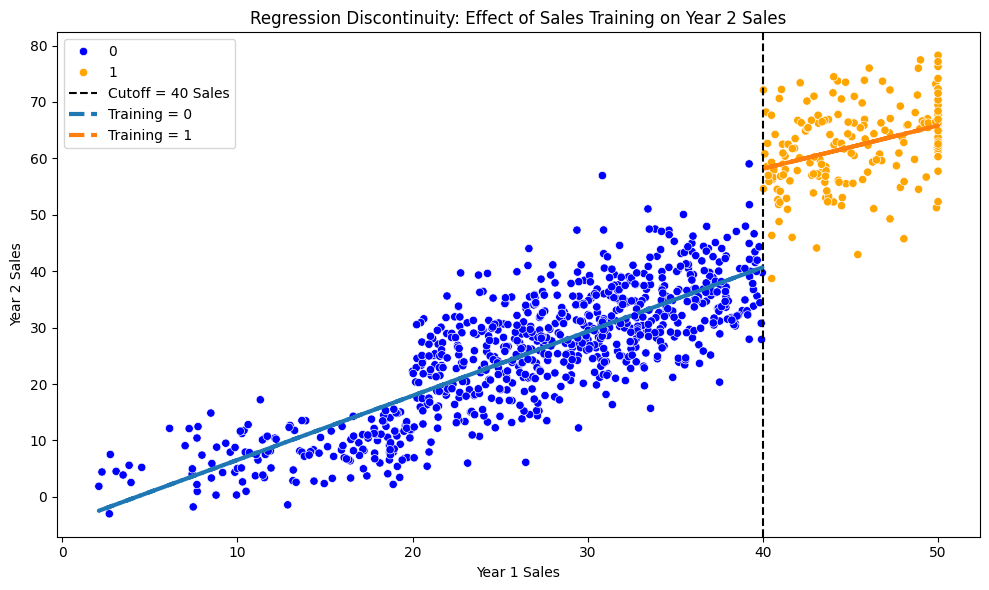

In [2]:

df = pd.read_csv("../data/rd_employee_sales_data.csv")
cutoff = 40


# Optional: visualize the discontinuity
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Year1_Sales", y="Year2_Sales", hue="Training", data=df, palette={0: "blue", 1: "orange"})
plt.axvline(cutoff, color='black', linestyle='--', label="Cutoff = 40 Sales")
plt.title("Regression Discontinuity: Effect of Sales Training on Year 2 Sales")
plt.xlabel("Year 1 Sales")
plt.ylabel("Year 2 Sales")

# Add linear slope fits for each value of Training
for training_value in [0, 1]:
    subset = df[df["Training"] == training_value]
    slope, intercept, r_value, p_value, std_err = stats.linregress(subset["Year1_Sales"], subset["Year2_Sales"])
    plt.plot(
        subset["Year1_Sales"],
        slope * subset["Year1_Sales"] + intercept,
        label=f"Training = {training_value}",
        linestyle="--",
        linewidth=3,
    )

plt.tight_layout()
plt.legend()
plt.show()

In [3]:
# Naive regression model without considering the running variable 
formula = "Year2_Sales ~ Training"
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Year2_Sales   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1797.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.96e-225
Time:                        13:12:45   Log-Likelihood:                -3783.7
No. Observations:                1000   AIC:                             7571.
Df Residuals:                     998   BIC:                             7581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7360      0.374     68.849      0.0

In [4]:
# Regression model considering the running variable but no window 
formula = "Year2_Sales ~ Training + Year1_Sales"
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Year2_Sales   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     3084.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:12:45   Log-Likelihood:                -3312.5
No. Observations:                1000   AIC:                             6631.
Df Residuals:                     997   BIC:                             6646.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.4550      0.799     -5.576      

In [5]:
# Regression model using a window around the cutoff plus the running variable 
subset = df[(df["Year1_Sales"] >= cutoff - 10) & (df["Year1_Sales"] <= cutoff + 10)]
formula = "Year2_Sales ~ Training + Year1_Sales"
model = smf.ols(formula, data=subset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Year2_Sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.51e-189
Time:                        13:12:45   Log-Likelihood:                -1717.0
No. Observations:                 519   AIC:                             3440.
Df Residuals:                     516   BIC:                             3453.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6052      3.297      1.700      